In [19]:
import run_simulation as rs
import numpy as np	
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tdgl
import os 


In [20]:
rs.check_system()

GPU is available
GPU:  b'NVIDIA GeForce RTX 4060 Laptop GPU'


In [22]:
xi=0.1
size=1.0

min_c=0
max_c=50
num_c=3
H_field_range=np.round(np.linspace(0,25,20),3)
current_range=np.round(np.linspace(min_c,max_c,num_c), 3)
device=rs.define_4_terminal_mesh(size,size,xi=xi, probes=[((-size*(0.4),0),
					   				(size*(0.4),0),)],
									terminal_width=size/30,
									terminal_height=size/10
									)
z=np.zeros((10,10))

In [24]:
folder_path = 'H_fields_4'
files = rs.get_all_files(folder_path)

data_list=[]

for file in files:
	H_field, current = rs.extract_numbers(file)
	array=np.load(file)
	data=[H_field,current,array]
	data_list.append(data)
	

In [25]:
H_fields_list=[]
currents_for_H=[]
currents=[]


for data in data_list:
	if data[0] not in H_fields_list:
		H_fields_list.append(data[0])
		currents_for_H.append(currents)
		currents=[data[1]]
	else:
		index=H_fields_list.index(data[0])
		currents.append(data[1])
		
currents_for_H.append(currents)
currents_for_H=currents_for_H[1:]
	

found_Hs,missing_Hs=rs.check_elements_in_list(H_field_range,H_fields_list)

print(f"found data for H= {found_Hs}")
print(f"missing data for H= {missing_Hs}")

simulations_to_be_computed={}

for ii in range(len(found_Hs)):
	found_C,missing_C=rs.check_elements_in_list(current_range,currents_for_H[ii])

	simulations_to_be_computed[found_Hs[ii]]=np.array(missing_C)

for ii in range(len(missing_Hs)):

	simulations_to_be_computed[missing_Hs[ii]]=current_range

for key, value in simulations_to_be_computed.items():
    print(f"{key}: {value}")

found data for H= [0.0, 1.316, 2.632]
missing data for H= [3.947, 5.263, 6.579, 7.895, 9.211, 10.526, 11.842, 13.158, 14.474, 15.789, 17.105, 18.421, 19.737, 21.053, 22.368, 23.684, 25.0]
0.0: []
1.316: []
2.632: []
3.947: [ 0. 25. 50.]
5.263: [ 0. 25. 50.]
6.579: [ 0. 25. 50.]
7.895: [ 0. 25. 50.]
9.211: [ 0. 25. 50.]
10.526: [ 0. 25. 50.]
11.842: [ 0. 25. 50.]
13.158: [ 0. 25. 50.]
14.474: [ 0. 25. 50.]
15.789: [ 0. 25. 50.]
17.105: [ 0. 25. 50.]
18.421: [ 0. 25. 50.]
19.737: [ 0. 25. 50.]
21.053: [ 0. 25. 50.]
22.368: [ 0. 25. 50.]
23.684: [ 0. 25. 50.]
25.0: [ 0. 25. 50.]


In [26]:
rs.build_mesh(device,max_edge_L=xi/4,plot=False)

Constructing Voronoi polygons: 100%|██████████| 5730/5730 [00:04<00:00, 1177.42it/s]

num_sites: 5730
num_elements: 11058
min_edge_length: 0.006176786351417163
max_edge_length: 0.02562758848145121
mean_edge_length: 0.014395335339315689
min_area: 2.309249471036603e-05
max_area: 0.0003865282402036166
mean_area: 0.00017452006980802793
coherence_length: 0.1
length_units: um


In [ ]:
for H in simulations_to_be_computed:
	currents=simulations_to_be_computed[H]
	if currents.size == 0:
		continue
	else:
		print(f"simulating H={H}, \nc={currents}------------------------------------")
		solutions,currents=rs.current_series(device,
						current_range=currents,
						H_field=H,
						solve_time=50
						)
		jj=0
		for solution in solutions:
			voltage=solution.dynamics.voltage()
			time=solution.dynamics.time
			solution.to_hdf5(f'H_solutions/solution_{H}_{currents[jj]}_.hdf5')

			np.save(f'{folder_path}/voltages_{H}_{currents[jj]}_.npy',np.array((time,voltage)))
			jj+=1


simulating H=3.947, 
c=[ 0. 25. 50.]------------------------------------


Simulating:  33%|███▎      | 16/50 [00:07<00:08,  3.91tau/s ]

In [6]:



folder_path = 'H_fields_4'
files = rs.get_all_files(folder_path)

data_list=[]

for file in files:
	H_field, current = rs.extract_numbers(file)
	array=np.load(file)
	data=[H_field,current,array]
	data_list.append(data)



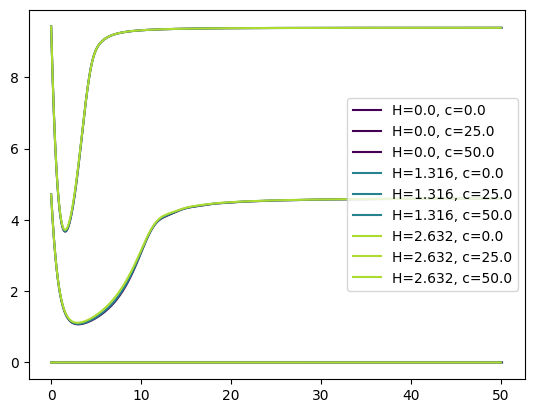

In [18]:
for H in H_field_range:
	for data in data_list:
		if data[0]==H:
			plt.plot(data[2][0],data[2][1],label=f'H={data[0]}, c={data[1]}',c=cm.viridis(data[0]/3))
		# plt.plot(data[2][0],data[2][1],label=f'H={data[0]}, c={data[1]}')

plt.legend()
# plt.plot(data[2][0],data[2][1])